<a href="https://colab.research.google.com/github/SergeiRaik/hy-research/blob/main/polyplex-analysis/nanodrop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!wget https://github.com/SergeiRaik/hy-research/raw/main/polyplex-analysis/nanodrop-data/nanodrop_28052024.zip
#!unzip /content/nanodrop_28052024.zip

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
filepath = 'nanodrop-data/nanodrop_28052024_unzipped/oligo1.csv'
df = pd.read_csv(filepath, encoding = 'utf-16', delimiter = '\t')
df

,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A260,A280,Nucleic Acid Factor,Baseline Correction (nm),Baseline Absorbance,Oligo Sequence
0,5/28/2024 12:45:46 PM,NaN,14.718,1.831,2.284,0.464,0.253,31.73,340,0.014,TGGCTTGAAGATGTACTCGAT
1,5/28/2024 12:47:19 PM,NaN,11.092,1.112,1.030,0.350,0.314,31.73,340,0.279,TGGCTTGAAGATGTACTCGAT
2,5/28/2024 12:48:49 PM,NaN,17.888,1.319,1.113,0.564,0.427,31.73,340,0.157,TGGCTTGAAGATGTACTCGAT
3,5/28/2024 12:50:47 PM,NaN,6.846,1.590,1.523,0.216,0.136,31.73,340,-0.019,TGGCTTGAAGATGTACTCGAT
4,5/28/2024 12:51:44 PM,NaN,7.185,1.797,1.880,0.226,0.126,31.73,340,0.009,TGGCTTGAAGATGTACTCGAT
5,5/28/2024 12:53:22 PM,NaN,0.189,1.212,0.227,0.006,0.005,31.73,340,-0.004,TGGCTTGAAGATGTACTCGAT
6,5/28/2024 12:55:02 PM,NaN,0.477,1.067,0.475,0.015,0.014,31.73,340,-0.012,TGGCTTGAAGATGTACTCGAT


In [5]:
sample_names = ['DNA', '2p5', '2p5_HA', 'DNA_filtr', 'DNA_filtr', '2p5_filtr', '2p5_HA_filtr']
df['Sample Name'] = sample_names

In [6]:
df=df.drop_duplicates(subset=['Sample Name'])
df

,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A260,A280,Nucleic Acid Factor,Baseline Correction (nm),Baseline Absorbance,Oligo Sequence
0,5/28/2024 12:45:46 PM,DNA,14.718,1.831,2.284,0.464,0.253,31.73,340,0.014,TGGCTTGAAGATGTACTCGAT
1,5/28/2024 12:47:19 PM,2p5,11.092,1.112,1.030,0.350,0.314,31.73,340,0.279,TGGCTTGAAGATGTACTCGAT
2,5/28/2024 12:48:49 PM,2p5_HA,17.888,1.319,1.113,0.564,0.427,31.73,340,0.157,TGGCTTGAAGATGTACTCGAT
3,5/28/2024 12:50:47 PM,DNA_filtr,6.846,1.590,1.523,0.216,0.136,31.73,340,-0.019,TGGCTTGAAGATGTACTCGAT
5,5/28/2024 12:53:22 PM,2p5_filtr,0.189,1.212,0.227,0.006,0.005,31.73,340,-0.004,TGGCTTGAAGATGTACTCGAT
6,5/28/2024 12:55:02 PM,2p5_HA_filtr,0.477,1.067,0.475,0.015,0.014,31.73,340,-0.012,TGGCTTGAAGATGTACTCGAT


In [7]:
df = df.sort_values(by=['Sample Name'])
df

,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A260,A280,Nucleic Acid Factor,Baseline Correction (nm),Baseline Absorbance,Oligo Sequence
1,5/28/2024 12:47:19 PM,2p5,11.092,1.112,1.030,0.350,0.314,31.73,340,0.279,TGGCTTGAAGATGTACTCGAT
2,5/28/2024 12:48:49 PM,2p5_HA,17.888,1.319,1.113,0.564,0.427,31.73,340,0.157,TGGCTTGAAGATGTACTCGAT
6,5/28/2024 12:55:02 PM,2p5_HA_filtr,0.477,1.067,0.475,0.015,0.014,31.73,340,-0.012,TGGCTTGAAGATGTACTCGAT
5,5/28/2024 12:53:22 PM,2p5_filtr,0.189,1.212,0.227,0.006,0.005,31.73,340,-0.004,TGGCTTGAAGATGTACTCGAT
0,5/28/2024 12:45:46 PM,DNA,14.718,1.831,2.284,0.464,0.253,31.73,340,0.014,TGGCTTGAAGATGTACTCGAT
3,5/28/2024 12:50:47 PM,DNA_filtr,6.846,1.590,1.523,0.216,0.136,31.73,340,-0.019,TGGCTTGAAGATGTACTCGAT


In [13]:
df['Date'].describe()

count                         6
unique                        6
top       5/28/2024 12:47:19 PM
freq                          1
Name: Date, dtype: object

/var/folders/6p/hs5cf_xs0g15bcyks4_l_s380000gn/T/ipykernel_2081/1790419739.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Sample Name', y='Nucleic Acid(ng/uL)', data=df,
/var/folders/6p/hs5cf_xs0g15bcyks4_l_s380000gn/T/ipykernel_2081/1790419739.py:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  barplot = sns.barplot(x='Sample Name', y='Nucleic Acid(ng/uL)', data=df,


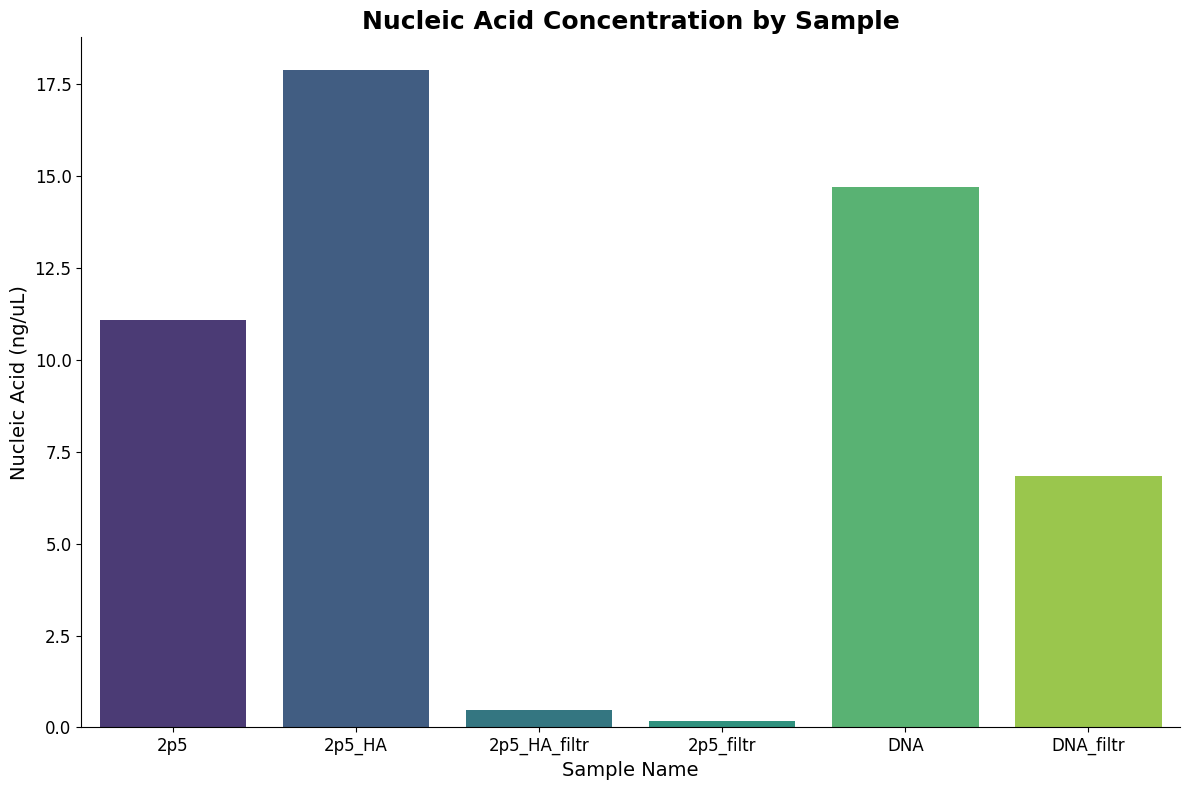

In [8]:
# Create the bar plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Sample Name', y='Nucleic Acid(ng/uL)', data=df, 
                      palette='viridis', capsize=0.1, errwidth=1.5)

# Add titles and labels
plt.title('Nucleic Acid Concentration by Sample', fontsize=18, weight='bold')
plt.xlabel('Sample Name', fontsize=14)
plt.ylabel('Nucleic Acid (ng/uL)', fontsize=14)

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.savefig('output/dna_binding.png')

In [9]:
file_path = 'nanodrop-data/nanodrop_28052024_unzipped/Oligo DNA 5_28_2024 12_45_46 PM.tsv'
spectra_df = pd.read_csv(file_path, delimiter='\t', comment = '/')
spectra_df



,5
Wavelength (nm),10mm Absorbance
220.0,0.268
220.5,0.257
221.0,0.249
221.5,0.243
...,...
348.0,0.005
348.5,0.005
349.0,0.005
349.5,0.007


In [10]:
import pandas as np
import numpy as np

# Read the file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Initialize storage for parsed data
timestamps = []
spectra_data = {}

# Parse the file line by line
current_timestamp = None

for line in lines:
    if line.startswith('//') or "Wavelength" in line:
        continue
    elif current_timestamp is None:
        current_timestamp = line.strip()
        timestamps.append(current_timestamp)
        spectra_data[current_timestamp] = []
    else:
        try:
            wavelength, absorbance = map(float, line.split())
            spectra_data[current_timestamp].append((wavelength, absorbance))
        except ValueError:
            # Start a new spectrum
            current_timestamp = line.strip()
            timestamps.append(current_timestamp)
            spectra_data[current_timestamp] = []

# Identify the unique set of wavelengths across all spectra
unique_wavelengths = sorted(set(
    point[0] for spectrum in spectra_data.values() for point in spectrum
))

# Initialize the spectra dictionary with the wavelength column
spectra_dict = {'Wavelength (nm)': unique_wavelengths}

# Populate the spectra dictionary with absorbance data
for timestamp in timestamps:
    absorbance_dict = {wavelength: np.nan for wavelength in unique_wavelengths}
    for wavelength, absorbance in spectra_data[timestamp]:
        absorbance_dict[wavelength] = absorbance
    spectra_dict[timestamp] = [absorbance_dict[wavelength] for wavelength in unique_wavelengths]

# Create the final DataFrame
spectra_df = pd.DataFrame(spectra_dict)

# Display the DataFrame
spectra_df.head()

,Wavelength (nm),5/28/2024 12:45 PM,,5/28/2024 12:47 PM,5/28/2024 12:48 PM,5/28/2024 12:50 PM,5/28/2024 12:51 PM,5/28/2024 12:53 PM,5/28/2024 12:55 PM
0,220.0,0.268,NaN,0.457,0.771,0.248,0.185,0.035,0.016
1,220.5,0.257,NaN,0.452,0.751,0.237,0.180,0.033,0.015
2,221.0,0.249,NaN,0.445,0.732,0.230,0.176,0.033,0.017
3,221.5,0.243,NaN,0.435,0.712,0.221,0.168,0.031,0.018
4,222.0,0.234,NaN,0.423,0.687,0.209,0.160,0.027,0.017


In [11]:
spectra_df.columns

Index(['Wavelength (nm)', '5/28/2024 12:45 PM', '', '5/28/2024 12:47 PM',
       '5/28/2024 12:48 PM', '5/28/2024 12:50 PM', '5/28/2024 12:51 PM',
       '5/28/2024 12:53 PM', '5/28/2024 12:55 PM'],
      dtype='object')

In [12]:
spectra_df = spectra_df.drop(columns=[''])
spectra_df.head()

,Wavelength (nm),5/28/2024 12:45 PM,5/28/2024 12:47 PM,5/28/2024 12:48 PM,5/28/2024 12:50 PM,5/28/2024 12:51 PM,5/28/2024 12:53 PM,5/28/2024 12:55 PM
0,220.0,0.268,0.457,0.771,0.248,0.185,0.035,0.016
1,220.5,0.257,0.452,0.751,0.237,0.180,0.033,0.015
2,221.0,0.249,0.445,0.732,0.230,0.176,0.033,0.017
3,221.5,0.243,0.435,0.712,0.221,0.168,0.031,0.018
4,222.0,0.234,0.423,0.687,0.209,0.160,0.027,0.017
